In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: x[: len('2015-05-07 19:52:06')])

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Hour'] = df['pickup_datetime'].dt.hour
df['Day_of_week'] = df['pickup_datetime'].dt.dayofweek
df.drop('pickup_datetime', axis=1, inplace=True)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,2


In [ ]:
import warning 
warning.filterwarning

In [9]:
def calc_dist(lat1, lat2, lon1, lon2):
    return np.arccos(np.sin(lat1)*np.sin(lat2)+np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1))*6371

df['distance'] = calc_dist(df.pickup_latitude, df.dropoff_latitude, df.pickup_longitude, df.dropoff_longitude)

df.drop(['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude'], axis=1, inplace=True)
df = df.dropna(subset=['distance'])
df

/home/samarth/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fare_amount,passenger_count,Year,Month,Date,Hour,Day_of_week,distance
0,7.5,1,2015,5,7,19,3,96.455397
1,7.7,1,2009,7,17,20,4,140.817077
2,12.9,1,2009,8,24,21,0,337.582823
3,5.3,3,2009,6,26,8,4,105.259325
4,16.0,5,2014,8,28,17,3,324.000600
...,...,...,...,...,...,...,...,...
199995,3.0,1,2012,10,28,10,6,6.770903
199996,7.5,1,2014,3,14,1,4,140.235130
199997,30.9,2,2009,6,29,0,0,901.097042
199998,14.5,1,2015,5,20,14,2,210.569095


In [10]:
df.passenger_count.value_counts()

1      138339
2       29417
5       13996
3        8877
4        4274
6        4270
0         708
208         1
Name: passenger_count, dtype: int64

In [11]:
df = df[(df.passenger_count != 0) & (df.passenger_count != 208)]

<AxesSubplot:ylabel='Density'>

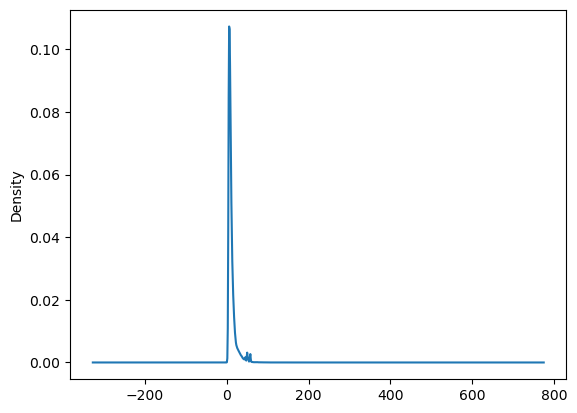

In [12]:
df.fare_amount.plot.density()

<AxesSubplot:ylabel='Density'>

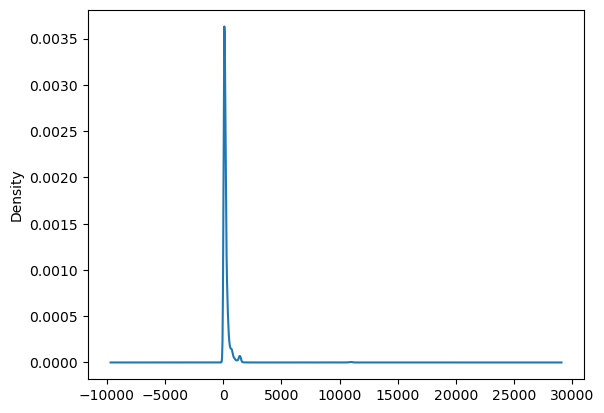

In [13]:
df.distance.plot.density()

<AxesSubplot:ylabel='Density'>

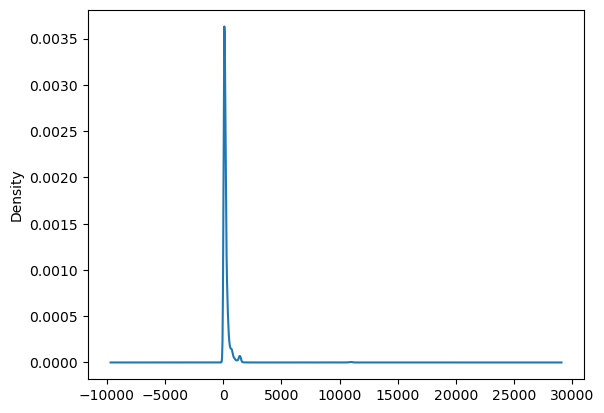

In [14]:
df.distance.plot.density()

In [15]:
stats = df[['fare_amount', 'passenger_count', 'distance']].describe()
print(stats)

         fare_amount  passenger_count       distance
count  199173.000000    199173.000000  199173.000000
mean       11.367325         1.689486     237.948717
std         9.909668         1.305379     587.111353
min       -52.000000         1.000000       0.000000
25%         6.000000         1.000000      79.117379
50%         8.500000         1.000000     136.736789
75%        12.500000         2.000000     243.904541
max       499.000000         6.000000   19382.593927


In [16]:
distance_limits = [df.distance.quantile(.025), df.distance.quantile(.975)]
print(distance_limits)
fare_limits = [df.fare_amount.quantile(.025), df.fare_amount.quantile(.975)]
print(fare_limits)

[0.0, 1031.1429589583965]
[3.7, 43.33]


In [17]:
df_new = df[(df.distance > 0) & (df.distance < 1032)]
df_new = df_new[(df_new.fare_amount > 4) & (df_new.fare_amount < 44)]

<AxesSubplot:>

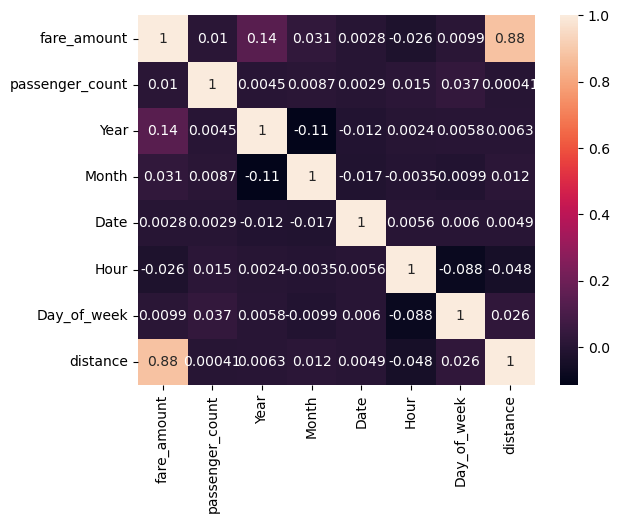

In [18]:
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix, annot=True)

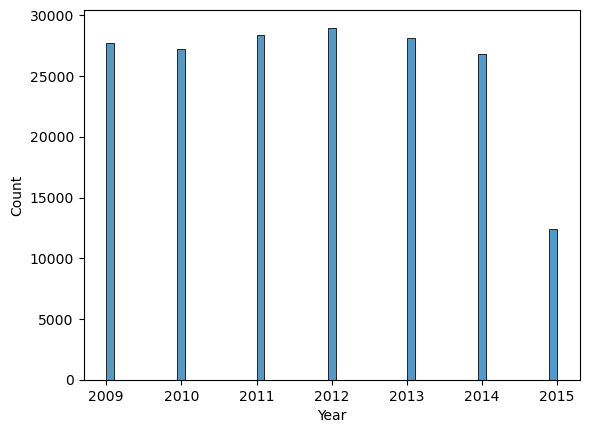

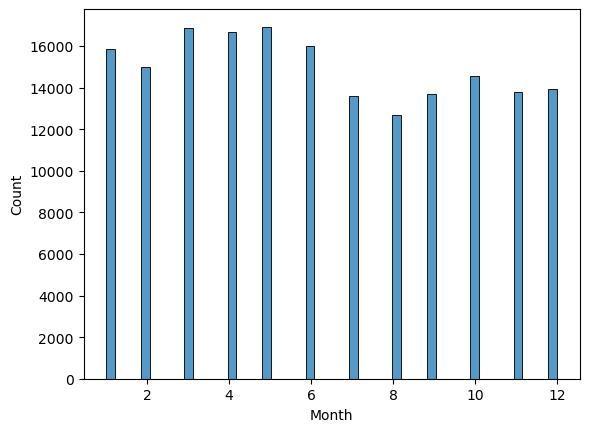

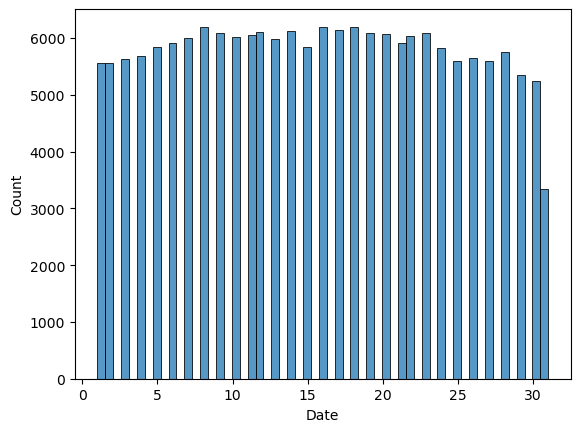

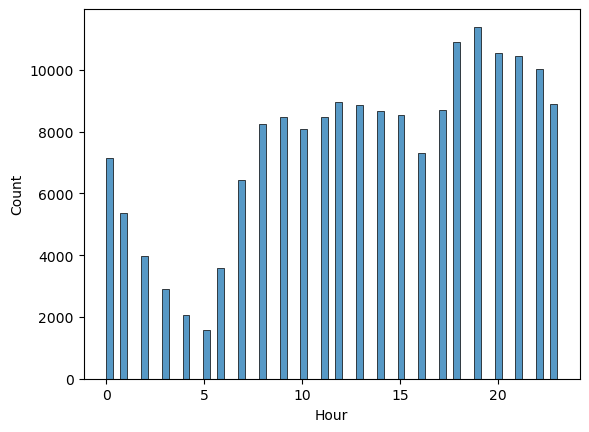

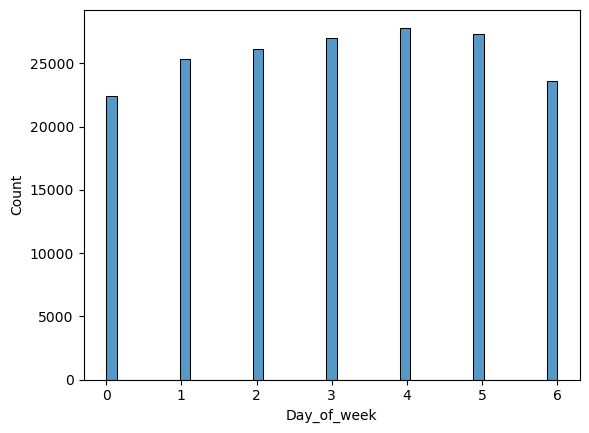

In [19]:
cols = ['Year', 'Month', 'Date', 'Hour', 'Day_of_week']

for col in cols:
    plt.figure()
    sns.histplot(df_new[col])

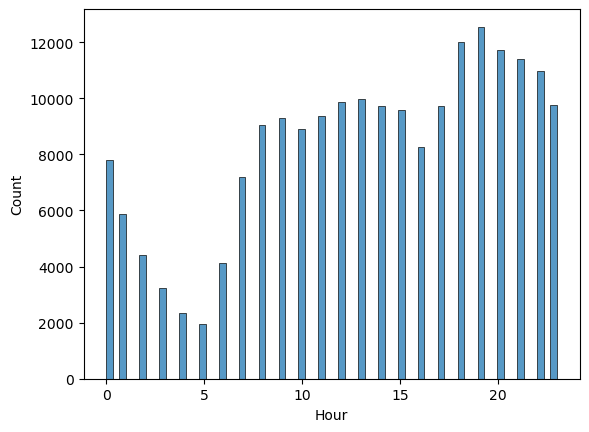

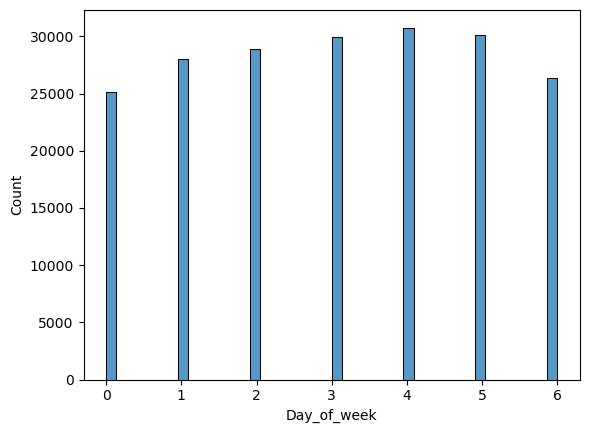

In [20]:
cols = ['Hour', 'Day_of_week']

for col in cols:
    plt.figure()
    sns.histplot(df[col])

<AxesSubplot:xlabel='Day_of_week', ylabel='distance'>

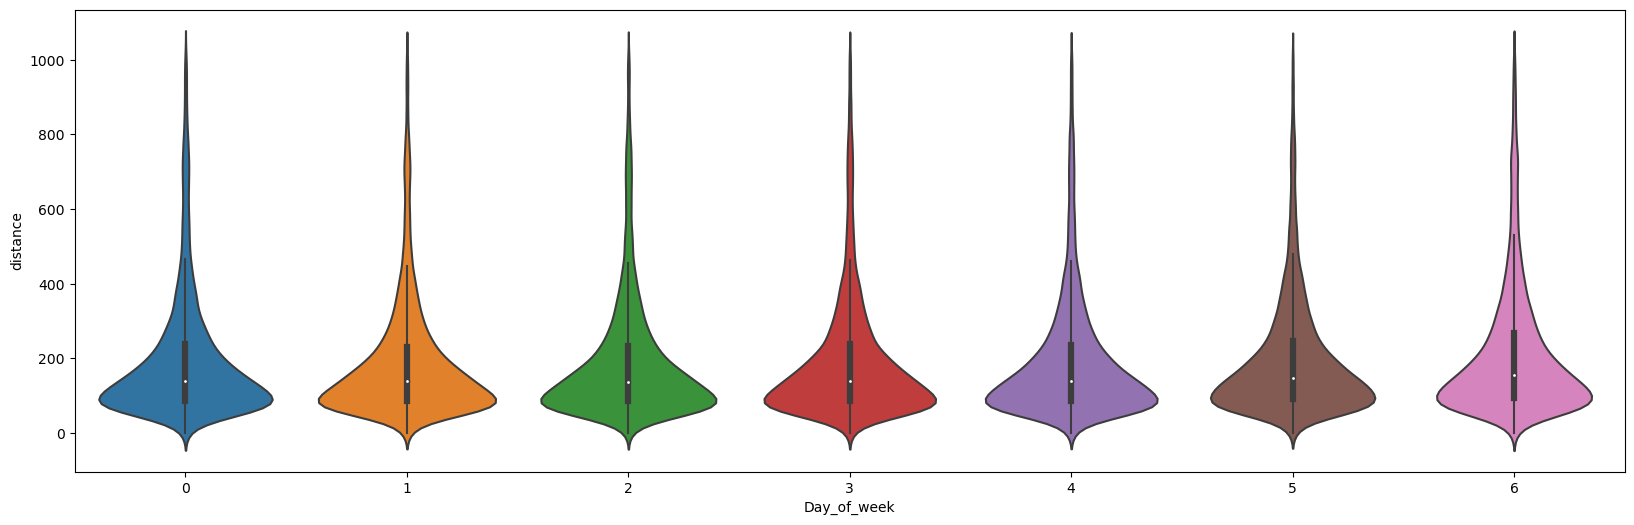

In [21]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Day_of_week', y='distance', data=df_new)

<AxesSubplot:xlabel='Hour', ylabel='fare_amount'>

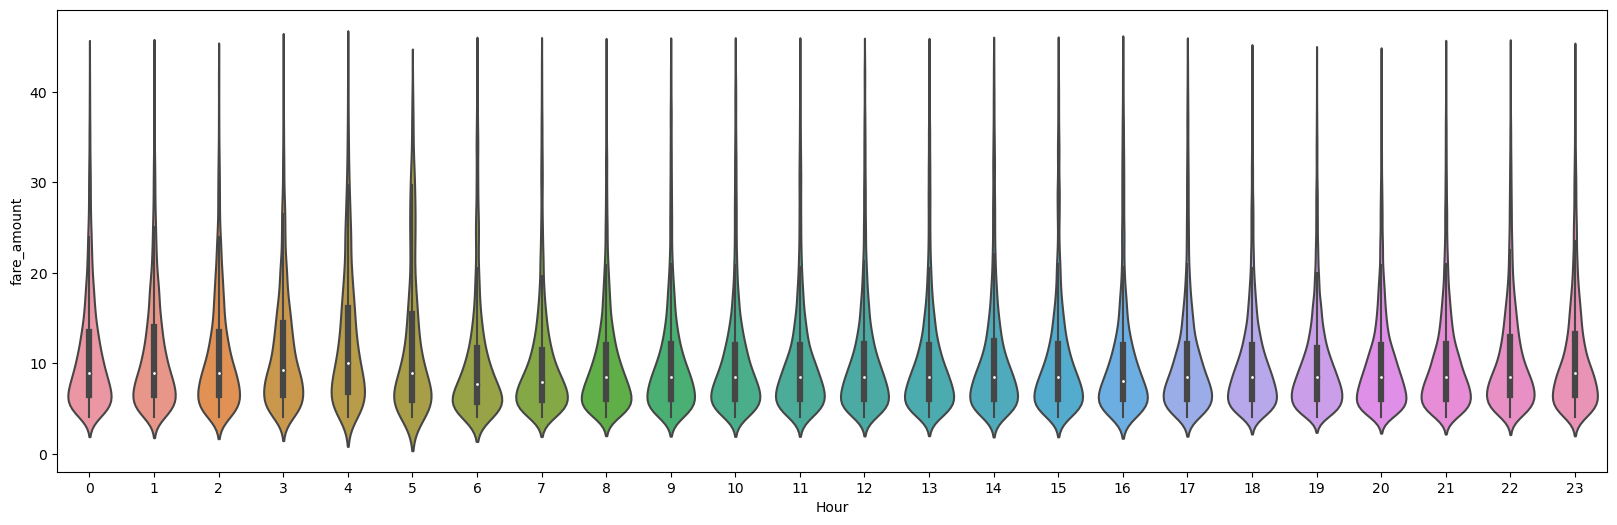

In [22]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Hour', y='fare_amount', data=df_new)